<table style="width:100%">
  <tr>
    <th><img src="https://www.panbo.com/images/WindVectors2d5.jpg" alt="Wind Vectors" style="width: 500px;"/></th>
    <th><img src="./SailingVectors1.png" style="width: 300px;"/></th> 
  </tr>
</table>  


  - GW=TW+SD
  - TW=AW+VB
  - OG=VB+SD



In [ ]:
def unit_vector(vector):
        """ Returns the unit vector of the vector.  """
        return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = self.unit_vector(v1)
    v2_u = self.unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [48]:
import sympy as sp
sp.init_printing()
GWu,GWv,TWu,TWv,SDu,SDv,AWu,AWv=sp.var('GWu GWv TWu TWv SDu SDv AWu AWv')
HDG,SOG,COG,VBB=sp.var('HDG SOG COG VBB')
GW = sp.Matrix([GWu,GWv])
TW = sp.Matrix([TWu,TWv])
SD = sp.Matrix([SDu,SDv])
BV = sp.Matrix([SDu,SDv])
#AW = sp.Matrix([AWu,AWv])
VB=sp.Function('VB')(TWu,TWv,HDG)
BV = VB*sp.Matrix([sp.cos(HDG),sp.sin(HDG)])
OG = SOG*sp.Matrix([sp.cos(COG),sp.sin(COG)])
eq1=sp.Eq(GW-SD,TW)
eq2=sp.Eq(OG,BV+SD)
#eq3=sp.Eq()
sys1=[eq1,eq2]
sys1

⎡⎡GWu - SDu⎤ = ⎡TWu⎤, ⎡SOG⋅cos(COG)⎤ = ⎡SDu + VB(TWu, TWv, HDG)⋅cos(HDG)⎤⎤
⎢⎢         ⎥   ⎢   ⎥  ⎢            ⎥   ⎢                                ⎥⎥
⎣⎣GWv - SDv⎦   ⎣TWv⎦  ⎣SOG⋅sin(COG)⎦   ⎣SDv + VB(TWu, TWv, HDG)⋅sin(HDG)⎦⎦

In [49]:
#GOAL: MAXIMIZE SOG
#    IF |cos(COG)| > 0.2:
#        MAXIMIZE[ SOG=(SDu+VB(TWu,TWv,HDG)cos(HDG))/cos(COG), HDG]
#    ELSE:
#        MAXIMIZE[ SOG=(SDu+VB(TWu,TWv,HDG)sin(HDG))/sin(COG), HDG]


NotImplementedError: could not solve -SDv + (SDu + VB(TWu, TWv, HDG)*cos(HDG))*sin(COG)/cos(COG) - VB(TWu, TWv, HDG)*sin(HDG)

In [7]:
import numpy as np
from math import atan2
atan2(2,1)*180./np.pi

In [44]:
del(AW)

In [5]:
import math
math.atan2

In [1]:
import sys
print "Python Version: %s\n"%(str(sys.version))

Python Version: 2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]



In [234]:
import io
import numpy as np
import pandas as pd
import re
steveB_sailchoice="""VTW,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160
35,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS
30,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS
29,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,J2,J2,J2,J2,J2
28,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,J2,J2,J2,J2,J2,J2,J2
27,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,J2,J2,J2,J2,J2,J2,J2,J2
26,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,J3,J3,J2,J2,J2,J2,J2,J2,J2,J2,J2,
25,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,SS,J3,J3,J3,J2,J2,J2,J2,J2,J2,J2,J2,J2,J2,
24,SS,SS,SS,SS,SS,SS,SS,J3,J3,J3,J3,J3,J3,J3,J2,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,
23,SS,SS,SS,SS,SS,SS,J3,J3,J3,J3,J3,J3,J3,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,
22,SS,SS,SS,SS,SS,J3,J3,J3,J3,J3,J3,J3,J3,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,J1,
21,SS,SS,SS,J3,J3,J3,J3,J3,J3,J3,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,J1,J1,,
20,SS,SS,J3,J3,J3,J2,J2,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,J1,J1,J1,J1,,
19,J3,J3,J3,J3,J2,J2,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,,
18,J3,J3,J3,J2,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,,
17,J3,J2,J2,J2,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,,
16,J2,J2,J2,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,
15,J2,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,
14,J2,J2,J2,J2,J2,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,
13,J2,J2,J2,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
12,J2,J2,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
11,J2,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
10,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
9,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
8,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
7,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,
6,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,,
5,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,,
4,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,,
2,J1,J1,J1,J1,J1,J1,J1,J1,J1,J1,J1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1,,,,
"""
with io.StringIO(steveB_sailchoice) as f:
    steveB1_sailchoice_DF=pd.read_csv(f)
cleanEnder=re.compile(',{1,4}\n')
clean_sails=cleanEnder.sub("\n",steveB_sailchoice)
myDFdict={"VTW":[],"sail":[],"BTW":[]}
with io.StringIO(clean_sails) as f:
    _ = f.readline()  #ditch the first row
    for thisline in f.readlines():
        thisrow=thisline.strip().split(",")
        VTW=thisrow.pop(0)
        for i,x in enumerate(thisrow):
            myDFdict["VTW"].append(int(VTW))
            myDFdict["sail"].append(x)
            myDFdict["BTW"].append(35+5*i)
steveB1_sailchoice_DF2=pd.DataFrame(myDFdict)
steveB1_sailchoice_DF2



,VTW,sail,BTW
0,35,SS,35
1,35,SS,40
2,35,SS,45
3,35,SS,50
4,35,SS,55
...,...,...,...
691,2,A1,120
692,2,A1,125
693,2,A1,130
694,2,A1,135


In [127]:
polarsTXT="""
VTW,BTW,VAW,BAW,V,VMG,PHI,REEF,FLAT,sailNum,SAIL
 6.0,40.0,8.97,25.16,3.571,2.736,2.6,1.0000,.8007,4,Jib
 6.0,45.0,9.60,25.91,4.430,3.132,3.5,1.0000,.9475,4,Jib
 6.0,50.0,10.00,27.01,5.083,3.268,4.0,1.0000,1.0000,3,Jib
 6.0,55.0,10.21,28.39,5.569,3.194,4.2,1.0000,1.0000,3,Jib
 6.0,60.0,10.29,29.92,5.941,2.971,4.3,1.0000,1.0000,3,Jib
 6.0,65.0,10.26,31.57,6.224,2.631,4.4,1.0000,1.0000,3,Jib
 6.0,70.0,10.13,33.34,6.428,2.199,4.3,1.0000,1.0000,3,Jib
 6.0,75.0,9.93,35.22,6.566,1.699,4.2,1.0000,1.0000,3,Jib
 6.0,80.0,9.82,37.63,6.703,1.164,5.6,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,85.0,9.57,39.35,6.854,.597,5.5,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,90.0,9.25,41.21,6.945,.000,5.2,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,95.0,8.85,43.32,6.963,-.607,4.7,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,100.0,8.39,45.70,6.915,-1.201,4.2,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,105.0,7.89,48.37,6.815,-1.764,3.7,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,110.0,7.34,51.38,6.669,-2.281,3.2,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,115.0,6.77,54.81,6.482,-2.739,2.7,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,120.0,6.18,58.92,6.243,-3.121,2.3,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,125.0,5.56,64.12,5.932,-3.402,1.8,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,130.0,4.95,70.88,5.551,-3.568,1.4,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,135.0,4.39,79.53,5.119,-3.620,1.0,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,140.0,3.93,89.86,4.691,-3.593,.7,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,145.0,3.57,101.12,4.317,-3.536,.5,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,150.0,3.31,112.79,4.009,-3.471,.4,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,155.0,3.14,124.74,3.747,-3.396,.3,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,160.0,3.05,136.79,3.517,-3.305,.2,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,165.0,3.02,148.40,3.332,-3.218,.1,1.0000,1.0000,2,Asym Spin tacked on CL
 6.0,170.0,2.84,158.67,3.215,-3.166,.0,1.0000,1.0000,3,Poled Jib
 6.0,175.0,2.81,169.37,3.166,-3.154,.0,1.0000,1.0000,3,Poled Jib
 6.0,180.0,2.87,180.00,3.086,-3.086,.0,1.0000,1.0000,2,Poled Jib
 8.0,40.0,11.87,25.34,4.655,3.566,4.1,1.0000,.7845,4,Jib
 8.0,45.0,12.53,26.40,5.620,3.974,5.8,1.0000,.9125,4,Jib
 8.0,50.0,12.93,27.73,6.338,4.074,7.8,1.0000,1.0000,3,Jib
 8.0,55.0,13.09,29.41,6.837,3.922,8.2,1.0000,1.0000,3,Jib
 8.0,60.0,13.12,31.20,7.232,3.616,8.4,1.0000,1.0000,3,Jib
 8.0,65.0,13.04,33.05,7.552,3.192,8.5,1.0000,1.0000,3,Jib
 8.0,70.0,12.85,35.05,7.780,2.661,8.2,1.0000,1.0000,3,Jib
 8.0,75.0,12.75,37.33,7.954,2.059,12.1,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,80.0,12.47,39.27,8.155,1.416,12.1,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,85.0,12.09,41.43,8.279,.722,11.4,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,90.0,11.64,43.80,8.339,.000,10.3,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,95.0,11.13,46.37,8.340,-.727,8.9,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,100.0,10.57,49.09,8.300,-1.441,7.4,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,105.0,9.96,51.99,8.219,-2.127,6.0,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,110.0,9.31,55.14,8.096,-2.769,4.9,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,115.0,8.63,58.71,7.918,-3.346,4.1,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,120.0,7.91,63.01,7.660,-3.830,3.3,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,125.0,7.18,68.42,7.309,-4.192,2.7,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,130.0,6.46,75.03,6.905,-4.438,2.1,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,135.0,5.81,82.78,6.490,-4.589,1.5,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,140.0,5.24,92.12,6.048,-4.633,1.2,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,145.0,4.79,102.52,5.637,-4.617,.9,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,150.0,4.44,113.54,5.281,-4.574,.6,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,155.0,4.21,125.06,4.968,-4.502,.4,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,160.0,4.07,136.84,4.685,-4.403,.3,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,165.0,4.02,148.33,4.451,-4.299,.2,1.0000,1.0000,2,Asym Spin tacked on CL
 8.0,170.0,3.78,158.59,4.300,-4.235,.0,1.0000,1.0000,3,Poled Jib
 8.0,175.0,3.73,169.32,4.238,-4.221,.0,1.0000,1.0000,3,Poled Jib
 8.0,180.0,3.80,180.00,4.134,-4.134,.0,1.0000,1.0000,3,Poled Jib
10.0,40.0,14.54,25.80,5.498,4.212,6.2,1.0000,.7410,4,Jib
10.0,45.0,15.19,27.07,6.502,4.598,9.4,1.0000,.8563,3,Jib
10.0,50.0,15.51,28.63,7.204,4.630,11.9,1.0000,.9397,3,Jib
10.0,55.0,15.68,30.24,7.790,4.468,13.9,1.0000,.9985,4,Jib
10.0,60.0,15.63,32.28,8.171,4.086,14.1,1.0000,1.0000,3,Jib
10.0,65.0,15.42,34.58,8.413,3.555,13.9,1.0000,1.0000,3,Jib
10.0,70.0,15.12,37.03,8.578,2.934,13.3,1.0000,1.0000,3,Jib
10.0,75.0,14.92,38.95,8.713,2.255,20.1,1.0000,.9900,2,Asym Spin tacked on CL
10.0,80.0,14.54,41.44,8.876,1.541,19.3,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,85.0,14.09,44.24,8.985,.783,17.5,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,90.0,13.57,47.19,9.045,.000,15.4,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,95.0,12.99,50.27,9.057,-.789,13.3,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,100.0,12.36,53.45,9.034,-1.569,11.2,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,105.0,11.69,56.76,8.980,-2.324,9.3,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,110.0,10.98,60.28,8.891,-3.041,7.4,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,115.0,10.25,64.08,8.763,-3.703,5.6,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,120.0,9.48,68.31,8.587,-4.294,4.4,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,125.0,8.71,73.19,8.356,-4.792,3.5,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,130.0,7.94,79.12,8.044,-5.170,2.7,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,135.0,7.21,86.60,7.628,-5.394,2.1,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,140.0,6.58,95.51,7.170,-5.492,1.6,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,145.0,6.05,105.04,6.773,-5.548,1.2,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,150.0,5.63,115.22,6.422,-5.561,.9,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,155.0,5.33,126.18,6.083,-5.513,.7,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,160.0,5.16,137.54,5.764,-5.417,.5,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,165.0,5.08,148.72,5.499,-5.312,.3,1.0000,1.0000,2,Asym Spin tacked on CL
10.0,170.0,4.76,158.79,5.331,-5.250,.0,1.0000,1.0000,3,Poled Jib
10.0,175.0,4.71,169.41,5.256,-5.236,-.1,1.0000,1.0000,3,Poled Jib
10.0,180.0,4.79,180.00,5.135,-5.135,-.1,1.0000,1.0000,3,Poled Jib
12.0,40.0,17.03,26.32,6.140,4.703,9.0,1.0000,.6910,4,Jib
12.0,45.0,17.61,27.81,7.125,5.038,12.4,1.0000,.7845,3,Jib
12.0,50.0,17.92,29.48,7.872,5.060,15.0,1.0000,.8400,4,Jib
12.0,55.0,17.92,31.54,8.321,4.773,16.7,1.0000,.8834,3,Jib
12.0,60.0,17.73,33.80,8.616,4.308,17.9,1.0000,.9242,3,Jib
12.0,65.0,17.45,36.18,8.838,3.735,18.8,1.0000,.9665,3,Jib
12.0,70.0,17.09,38.73,9.016,3.084,19.1,1.0000,1.0000,3,Jib
12.0,75.0,16.68,41.63,9.150,2.368,17.8,1.0000,1.0000,3,Jib
12.0,80.0,16.43,44.32,9.257,1.607,21.4,1.0000,.8736,2,Asym Spin tacked on CL
12.0,85.0,15.91,47.02,9.393,.819,21.5,1.0000,.9335,2,Asym Spin tacked on CL
12.0,90.0,15.35,49.83,9.511,.000,21.4,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,95.0,14.76,53.40,9.569,-.834,18.4,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,100.0,14.10,57.08,9.575,-1.663,15.6,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,105.0,13.38,60.88,9.538,-2.468,12.9,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,110.0,12.62,64.88,9.457,-3.234,10.2,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,115.0,11.82,69.14,9.335,-3.945,7.8,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,120.0,11.01,73.76,9.173,-4.586,5.6,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,125.0,10.20,78.85,8.974,-5.147,4.3,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,130.0,9.40,84.59,8.739,-5.617,3.4,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,135.0,8.64,91.14,8.469,-5.988,2.7,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,140.0,7.95,98.71,8.159,-6.250,2.1,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,145.0,7.35,107.50,7.802,-6.391,1.7,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,150.0,6.88,117.37,7.421,-6.427,1.3,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,155.0,6.54,127.89,7.057,-6.396,.9,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,160.0,6.33,138.64,6.736,-6.330,.7,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,165.0,6.20,149.35,6.467,-6.247,.5,1.0000,1.0000,2,Asym Spin tacked on CL
12.0,170.0,5.81,159.14,6.298,-6.202,.0,1.0000,1.0000,3,Poled Jib
12.0,175.0,5.74,169.59,6.213,-6.189,-.1,1.0000,1.0000,3,Poled Jib
12.0,180.0,5.83,180.00,6.077,-6.077,-.1,1.0000,1.0000,3,Poled Jib
16.0,40.0,21.52,27.49,6.900,5.286,13.0,1.0000,.5720,4,Jib
16.0,45.0,22.08,29.23,7.946,5.618,16.5,1.0000,.6234,4,Jib
16.0,50.0,22.13,31.57,8.479,5.450,18.5,1.0000,.6554,3,Jib
16.0,55.0,21.95,34.16,8.818,5.058,19.9,1.0000,.6840,4,Jib
16.0,60.0,21.67,36.94,9.076,4.538,20.5,1.0000,.7060,3,Jib
16.0,65.0,21.30,39.84,9.286,3.925,20.9,1.0000,.7319,3,Jib
16.0,70.0,20.86,42.81,9.465,3.237,21.2,1.0000,.7652,3,Jib
16.0,75.0,20.36,45.87,9.623,2.491,21.3,1.0000,.8088,3,Jib
16.0,80.0,19.80,49.01,9.763,1.695,21.5,1.0000,.8656,3,Jib
16.0,85.0,19.20,52.23,9.888,.862,21.5,1.0000,.9384,3,Jib
16.0,90.0,18.90,56.09,10.010,.000,22.5,1.0000,.7586,2,Asym Spin tacked on CL
16.0,95.0,18.21,59.51,10.144,-.884,22.4,1.0000,.8276,2,Asym Spin tacked on CL
16.0,100.0,17.47,63.02,10.271,-1.783,22.3,1.0000,.9120,2,Asym Spin tacked on CL
16.0,105.0,16.71,66.78,10.386,-2.688,21.7,1.0000,1.0000,3,Asym Spin tacked on CL
16.0,110.0,15.94,71.63,10.366,-3.545,17.1,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,115.0,15.09,76.64,10.261,-4.336,13.2,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,120.0,14.22,81.89,10.108,-5.054,9.9,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,125.0,13.35,87.45,9.926,-5.693,7.2,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,130.0,12.50,93.41,9.728,-6.253,5.2,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,135.0,11.69,99.86,9.522,-6.733,4.1,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,140.0,10.94,106.86,9.311,-7.132,3.3,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,145.0,10.27,114.49,9.094,-7.449,2.6,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,150.0,9.69,122.78,8.868,-7.680,2.0,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,155.0,9.23,131.73,8.628,-7.820,1.5,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,160.0,8.90,141.21,8.380,-7.874,1.1,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,165.0,8.69,150.96,8.143,-7.866,.8,1.0000,1.0000,2,Asym Spin tacked on CL
16.0,170.0,8.11,160.12,8.007,-7.885,-.1,1.0000,1.0000,3,Poled Jib
16.0,175.0,8.03,170.07,7.908,-7.878,-.2,1.0000,1.0000,3,Poled Jib
16.0,180.0,8.12,180.00,7.757,-7.757,-.2,1.0000,1.0000,3,Poled Jib
20.0,40.0,25.60,28.76,7.172,5.494,15.2,1.0000,.4573,4,Jib
20.0,45.0,26.09,30.78,8.218,5.811,18.6,1.0000,.4925,4,Jib
20.0,50.0,26.05,33.49,8.700,5.592,20.2,1.0000,.5131,3,Jib
20.0,55.0,25.82,36.48,9.026,5.177,21.0,1.0000,.5269,3,Jib
20.0,60.0,25.49,39.61,9.283,4.642,21.5,1.0000,.5438,3,Jib
20.0,65.0,25.07,42.83,9.502,4.016,21.8,1.0000,.5663,3,Jib
20.0,70.0,24.58,46.15,9.695,3.316,22.0,1.0000,.5970,3,Jib
20.0,75.0,24.03,49.54,9.872,2.555,22.1,1.0000,.6383,3,Jib
20.0,80.0,23.43,53.04,10.036,1.743,22.2,1.0000,.6924,3,Jib
20.0,85.0,22.77,56.63,10.187,.888,22.2,1.0000,.7595,3,Jib
20.0,90.0,22.05,60.33,10.326,.000,22.2,1.0000,.8390,3,Jib
20.0,95.0,21.78,64.66,10.494,-.915,23.0,1.0000,.6519,2,Asym Spin tacked on CL
20.0,100.0,20.99,68.56,10.667,-1.852,22.9,1.0000,.7256,2,Asym Spin tacked on CL
20.0,105.0,20.15,72.58,10.835,-2.804,22.8,1.0000,.8141,2,Asym Spin tacked on CL
20.0,110.0,19.27,76.75,10.994,-3.760,22.8,1.0000,.9192,2,Asym Spin tacked on CL
20.0,115.0,18.40,81.36,11.119,-4.699,20.9,1.0000,1.0000,3,Asym Spin tacked on CL
20.0,120.0,17.54,87.01,11.007,-5.503,16.1,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,125.0,16.64,92.89,10.823,-6.208,12.2,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,130.0,15.76,99.05,10.618,-6.825,9.2,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,135.0,14.93,105.56,10.409,-7.360,6.6,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,140.0,14.15,112.47,10.202,-7.815,4.8,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,145.0,13.46,119.83,9.997,-8.189,3.7,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,150.0,12.86,127.66,9.788,-8.477,2.9,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,155.0,12.37,135.92,9.578,-8.680,2.2,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,160.0,11.99,144.50,9.376,-8.810,1.7,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,165.0,11.73,153.29,9.200,-8.886,1.3,1.0000,1.0000,2,Asym Spin tacked on CL
20.0,170.0,10.96,161.67,9.138,-8.999,-.2,1.0000,1.0000,3,Poled Jib
20.0,175.0,10.85,170.83,9.053,-9.019,-.3,1.0000,1.0000,3,Poled Jib
20.0,180.0,10.90,180.00,8.940,-8.940,-.3,1.0000,1.0000,4,Poled Jib
24.0,40.0,29.25,30.32,6.906,5.291,15.7,1.0000,.3614,1,Jib
24.0,45.0,29.91,32.24,8.217,5.811,19.6,1.0000,.3936,9,Jib
24.0,50.0,29.85,35.19,8.730,5.612,21.0,1.0000,.4056,5,Jib
24.0,55.0,29.52,38.41,9.072,5.204,21.6,.9737,.4404,4,Jib
24.0,60.0,29.10,41.74,9.347,4.673,21.9,.9512,.4779,3,Jib
24.0,65.0,28.61,45.18,9.584,4.050,22.1,.9380,.5142,3,Jib
24.0,70.0,28.08,48.72,9.798,3.351,22.3,.9292,.5557,3,Jib
24.0,75.0,27.48,52.35,9.997,2.588,22.4,.9231,.6059,3,Jib
24.0,80.0,26.83,56.07,10.184,1.769,22.4,.9198,.6648,3,Jib
24.0,85.0,26.14,59.91,10.362,.903,22.5,.9210,.7281,3,Jib
24.0,90.0,25.64,64.05,10.536,.000,22.9,.8009,.7310,2,Asym Spin tacked on CL
24.0,95.0,24.95,68.15,10.739,-.936,23.0,.8331,.7456,2,Asym Spin tacked on CL
24.0,100.0,24.22,72.39,10.942,-1.900,23.1,.8705,.7615,2,Asym Spin tacked on CL
24.0,105.0,23.46,76.80,11.144,-2.884,23.1,.9118,.7809,2,Asym Spin tacked on CL
24.0,110.0,22.65,81.40,11.346,-3.880,23.2,.9559,.8060,2,Asym Spin tacked on CL
24.0,115.0,21.81,86.17,11.552,-4.882,23.3,1.0000,.8426,2,Asym Spin tacked on CL
24.0,120.0,20.80,90.91,11.768,-5.884,23.3,1.0000,.9652,2,Asym Spin tacked on CL
24.0,125.0,19.92,96.33,11.824,-6.782,19.3,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,130.0,19.05,102.57,11.617,-7.467,14.7,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,135.0,18.20,109.10,11.377,-8.045,11.0,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,140.0,17.42,115.97,11.129,-8.525,7.9,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,145.0,16.72,123.20,10.880,-8.912,5.4,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,150.0,16.13,130.82,10.632,-9.208,4.0,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,155.0,15.64,138.72,10.398,-9.424,3.1,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,160.0,15.27,146.83,10.190,-9.576,2.4,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,165.0,14.99,155.05,10.019,-9.678,1.8,1.0000,1.0000,2,Asym Spin tacked on CL
24.0,170.0,14.08,162.92,9.992,-9.841,-.3,1.0000,1.0000,3,Poled Jib
24.0,175.0,13.97,171.46,9.900,-9.862,-.5,1.0000,1.0000,3,Poled Jib
24.0,180.0,14.02,180.00,9.787,-9.787,-.4,1.0000,1.0000,5,Poled Jib
"""


In [134]:
import io
import numpy as np
import pandas as pd
with io.StringIO(polarsTXT) as f:
    shortPolarsDF=pd.read_csv(f)
shortPolarsDF.columns = shortPolarsDF.columns.str.strip()
shortPolarsDF.BTW=shortPolarsDF.BTW.round(decimals=0)
shortPolarsDF.BAW=shortPolarsDF.BAW.round(decimals=0)
for ii in shortPolarsDF.columns:
    print(f"{ii} {len(shortPolarsDF[ii].unique())}  {shortPolarsDF[ii].unique() if len(shortPolarsDF[ii].unique())<10 else ''} ")
shortPolarsDF


df


VTW 7  [ 6.  8. 10. 12. 16. 20. 24.] 
BTW 29   
VAW 198   
BAW 102   
V 202   
VMG 196   
PHI 128   
REEF 13   
FLAT 62   
sailNum 6  [4 3 2 1 9 5] 
SAIL 3  ['Jib' 'Asym Spin tacked on CL' 'Poled Jib'] 


,VTW,BTW,VAW,BAW,V,VMG,PHI,REEF,FLAT,sailNum,SAIL
0,6.0,40.0,8.97,25.0,3.571,2.736,2.6,1.0,0.8007,4,Jib
1,6.0,45.0,9.60,26.0,4.430,3.132,3.5,1.0,0.9475,4,Jib
2,6.0,50.0,10.00,27.0,5.083,3.268,4.0,1.0,1.0000,3,Jib
3,6.0,55.0,10.21,28.0,5.569,3.194,4.2,1.0,1.0000,3,Jib
4,6.0,60.0,10.29,30.0,5.941,2.971,4.3,1.0,1.0000,3,Jib
...,...,...,...,...,...,...,...,...,...,...,...
198,24.0,160.0,15.27,147.0,10.190,-9.576,2.4,1.0,1.0000,2,Asym Spin tacked on CL
199,24.0,165.0,14.99,155.0,10.019,-9.678,1.8,1.0,1.0000,2,Asym Spin tacked on CL
200,24.0,170.0,14.08,163.0,9.992,-9.841,-0.3,1.0,1.0000,3,Poled Jib
201,24.0,175.0,13.97,171.0,9.900,-9.862,-0.5,1.0,1.0000,3,Poled Jib


In [135]:
import re
import io
import numpy as np
import pandas as pd
with open("Sunflower_long_Polars.csv") as f:
    longPolarsDF=pd.read_csv(f)
longPolarsDF.columns = longPolarsDF.columns.str.strip()
longPolarsDF.BTW=longPolarsDF.BTW.round(decimals=0)
longPolarsDF.BAW=longPolarsDF.BAW.round(decimals=0)
for ii in longPolarsDF.columns:
    print(f"{ii} {len(longPolarsDF[ii].unique())}  {longPolarsDF[ii].unique() if len(longPolarsDF[ii].unique())<10 else ''} ")
longPolarsDF


VTW 7  [ 6.  8. 10. 12. 16. 20. 24.] 
BTW 145   
VAW 1362   
BAW 155   
V 1894   
VMG 2001   
PHI 235   
SAIL 3  ['Asym Spin tacked on CL' 'Jib' 'Poled Jib'] 
ShortSail 3  ['AS' 'J' 'PJ'] 
Notes 2  [nan 'OPTIMAL'] 


,VTW,BTW,VAW,BAW,V,VMG,PHI,SAIL,ShortSail,Notes
0,6.0,180.0,3.04,180.0,3.074,-3.074,0.0,Asym Spin tacked on CL,AS,NaN
1,6.0,179.0,3.03,178.0,3.080,-3.079,0.0,Asym Spin tacked on CL,AS,NaN
2,6.0,178.0,3.03,176.0,3.087,-3.085,0.0,Asym Spin tacked on CL,AS,NaN
3,6.0,177.0,3.02,174.0,3.095,-3.091,0.0,Asym Spin tacked on CL,AS,NaN
4,6.0,176.0,3.02,172.0,3.106,-3.098,0.0,Asym Spin tacked on CL,AS,NaN
...,...,...,...,...,...,...,...,...,...,...
2387,24.0,137.0,17.93,115.0,9.780,-7.152,4.5,Poled Jib,PJ,NaN
2388,24.0,136.0,18.08,114.0,9.797,-7.047,4.6,Poled Jib,PJ,NaN
2389,24.0,135.0,18.23,113.0,9.815,-6.940,4.6,Poled Jib,PJ,NaN
2390,24.0,173.0,13.99,168.0,9.942,-9.871,-0.4,Poled Jib,PJ,OPTIMAL


![Happy Christmas](boat_wind2.svg)


In [188]:
FNs=['TRWA','coOffset','VMC','VMT','VTW', 'BTW', 'VAW', 'BAW', 'V', 'VMG', 'PHI', 'REEF',	'FLAT','sailNum','SAIL', 'ShortSail', 'OPTIMAL']
finalDF=pd.DataFrame({XX:[] for XX in FNs})
itermeds={}
myTRWA=60
boatPolars=shortPolarsDF
#coOffset=-20
for myVwind in boatPolars.VTW.unique():
#if True:
    for myTRWA in range(0,180,5):
        inputs={XX:[] for XX in FNs}
        for coOffset in range(-80,85,5):
            myBTW=np.abs(myTRWA+coOffset)
            vMax=boatPolars.loc[ (boatPolars['BTW'] == myBTW) & (boatPolars['VTW'] == myVwind)].V.max()
            bestSpeedDF=boatPolars.loc[ (boatPolars['BTW'] == myBTW) & (boatPolars['VTW'] == myVwind) &(boatPolars['V'] == boatPolars.loc[ (boatPolars['BTW'] == myBTW) & (boatPolars['VTW'] == myVwind)].V.max())]
            if bestSpeedDF.BTW.count()>0:
                bestSpeed=bestSpeedDF.iloc[0].to_dict()
                inputs["TRWA"].append(myTRWA)
                inputs["coOffset"].append(coOffset)
                inputs["VMC"].append(bestSpeed["V"] * np.cos(coOffset*np.pi/180))
                inputs["VMT"].append(bestSpeed["V"] * np.sin(coOffset*np.pi/180))
                for kk in bestSpeed:
                    inputs[kk].append(bestSpeed[kk])
        tempDel=[]
        for kk in inputs.keys():
            if len(inputs[kk])<1:
                tempDel.append(kk)
        for kk in tempDel:
            del(inputs[kk])
        del(tempDel)
        interDF=pd.DataFrame(inputs)
        vMax=interDF.VMC.max()
        itermeds=interDF.loc[interDF["VMC"] == vMax].iloc[0].to_dict()
        itermeds={kk:[itermeds[kk]] for kk in itermeds }
        finalDF = finalDF.append(pd.DataFrame(itermeds), ignore_index = True)
finalDF



/var/folders/s6/4wdnb9rx1cl3r28sklncyvs00000gs/T/ipykernel_2374/2346536997.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finalDF = finalDF.append(pd.DataFrame(itermeds), ignore_index = True)


,TRWA,coOffset,VMC,VMT,VTW,BTW,VAW,BAW,V,VMG,PHI,REEF,FLAT,sailNum,SAIL,ShortSail,OPTIMAL
0,0.0,-50.0,3.267289,-3.893804,6.0,50.0,10.00,27.0,5.083,3.268,4.0,1.0,1.0,3.0,Jib,NaN,NaN
1,5.0,45.0,3.594224,3.594224,6.0,50.0,10.00,27.0,5.083,3.268,4.0,1.0,1.0,3.0,Jib,NaN,NaN
2,10.0,45.0,3.937878,3.937878,6.0,55.0,10.21,28.0,5.569,3.194,4.2,1.0,1.0,3.0,Jib,NaN,NaN
3,15.0,40.0,4.266102,3.579684,6.0,55.0,10.21,28.0,5.569,3.194,4.2,1.0,1.0,3.0,Jib,NaN,NaN
4,20.0,35.0,4.561858,3.194247,6.0,55.0,10.21,28.0,5.569,3.194,4.2,1.0,1.0,3.0,Jib,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,155.0,-15.0,10.749789,-2.880397,24.0,140.0,17.42,116.0,11.129,-8.525,7.9,1.0,1.0,2.0,Asym Spin tacked on CL,NaN,NaN
248,160.0,-15.0,10.509273,-2.815951,24.0,145.0,16.72,123.0,10.880,-8.912,5.4,1.0,1.0,2.0,Asym Spin tacked on CL,NaN,NaN
249,165.0,-15.0,10.269723,-2.751764,24.0,150.0,16.13,131.0,10.632,-9.208,4.0,1.0,1.0,2.0,Asym Spin tacked on CL,NaN,NaN
250,170.0,-15.0,10.043697,-2.691200,24.0,155.0,15.64,139.0,10.398,-9.424,3.1,1.0,1.0,2.0,Asym Spin tacked on CL,NaN,NaN


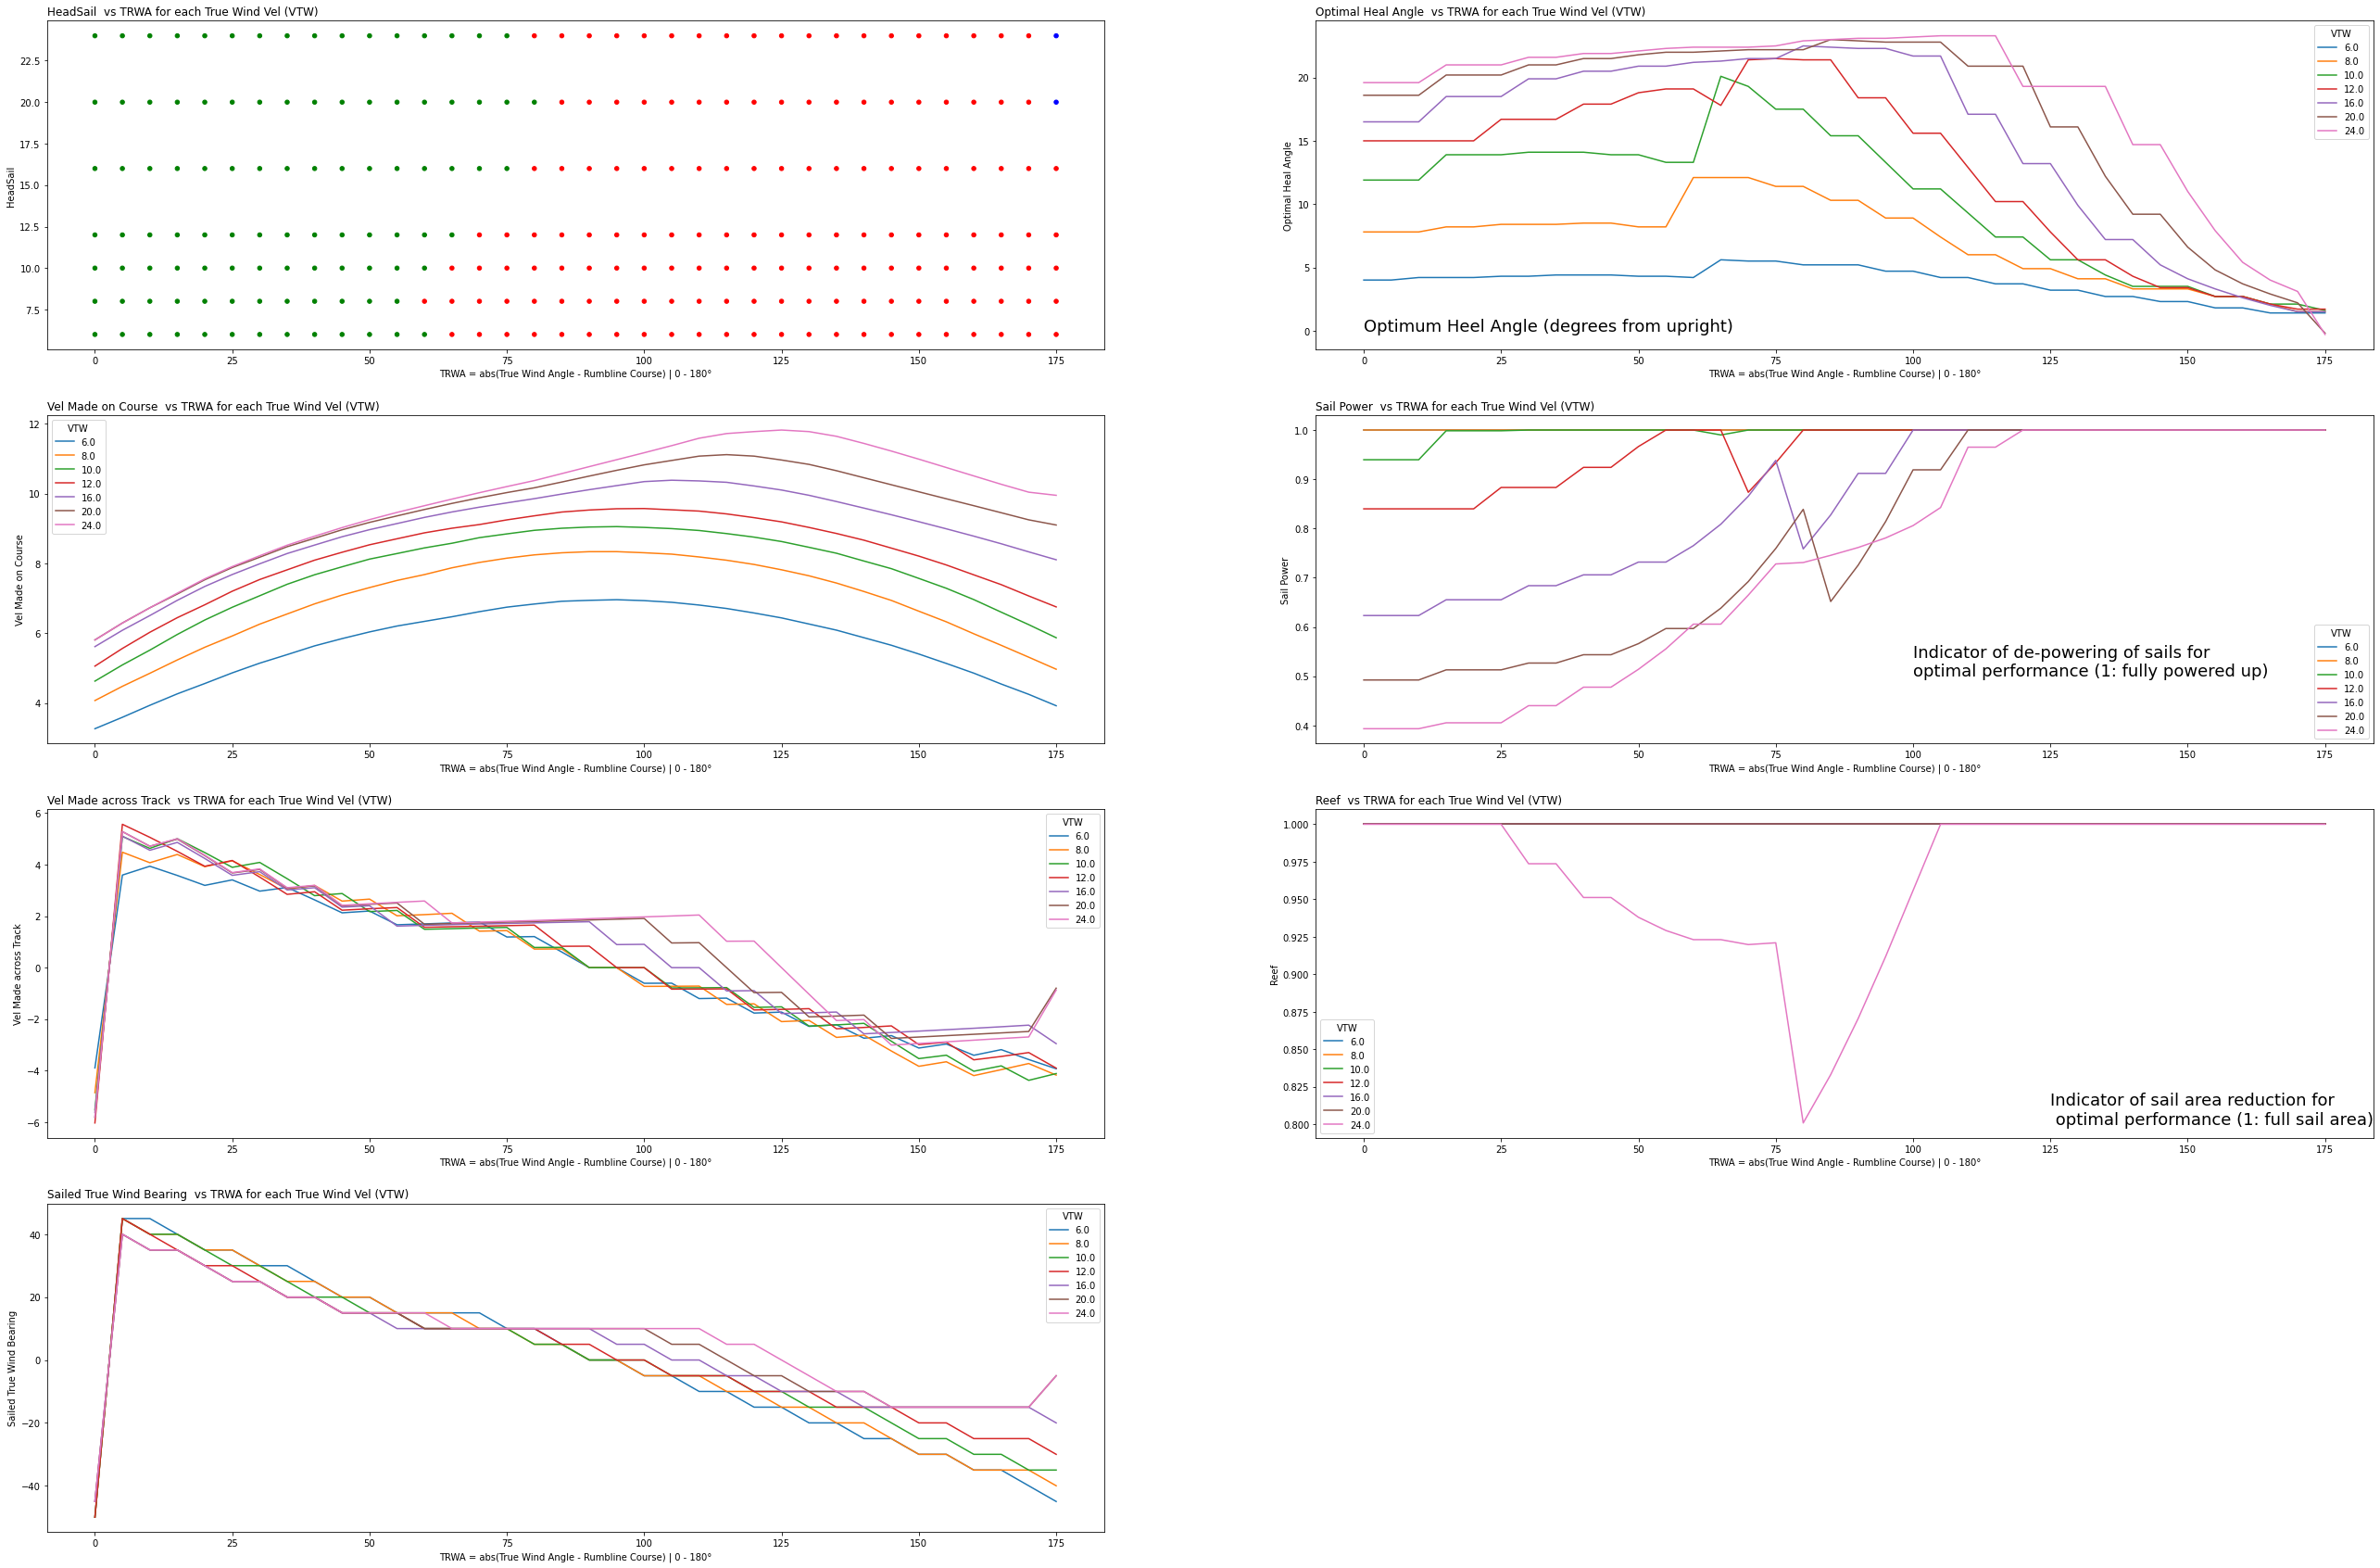

In [238]:
from matplotlib import pyplot as plt

# def visualize_box_relative_sizes(frame:pd.DataFrame,ax) -> pd.plotting.PlotAccessor:
#     title = f'Relative width and height for {frame.shape[0]} boxes.'
#     sns.scatterplot(x=frame["Relative Width"], y=frame["Relative Height"], hue=frame["Object Name"])
#     plt.title(title)

cmap = {'Asym Spin tacked on CL':'red', 'Jib':'green', 'Poled Jib':'blue'}
fig=plt.figure(figsize=(45,30))
ax1=fig.add_subplot(4,2,1)
ax2=fig.add_subplot(4,2,2)
ax3=fig.add_subplot(4,2,3)
ax4=fig.add_subplot(4,2,4)
ax5=fig.add_subplot(4,2,5)
ax6=fig.add_subplot(4,2,6)
ax7=fig.add_subplot(4,2,7)
HeadSailPlt=finalDF.plot(x='TRWA', y='VTW', kind='scatter', 
        c=[cmap.get(c, 'black') for c in finalDF.SAIL],ax=ax1,marker='o')
healAnglePlt=pd.pivot_table(finalDF.reset_index(),
               index='TRWA', columns='VTW', values='PHI'
              ).plot(ax=ax2)
vmcPlt=pd.pivot_table(finalDF.reset_index(),
               index='TRWA', columns='VTW', values='VMC'
              ).plot(ax=ax3)
vmtPlt=pd.pivot_table(finalDF.reset_index(),
               index='TRWA', columns='VTW', values='VMT'
              ).plot(ax=ax5)
BTWPlt=pd.pivot_table(finalDF.reset_index(),
               index='TRWA', columns='VTW', values='coOffset'
              ).plot(ax=ax7)
flatPlt=pd.pivot_table(finalDF.reset_index(),
               index='TRWA', columns='VTW', values='FLAT'
              ).plot(ax=ax4)

reefPlt=pd.pivot_table(finalDF.reset_index(),
               index='TRWA', columns='VTW', values='REEF'
              ).plot(ax=ax6)

trwaTXT=('TRWA = abs(True Wind Angle - Rumbline Course) | 0 - 180°','vs TRWA for each True Wind Vel (VTW)')

allLabels={'Optimal Heal Angle':[healAnglePlt,'Optimum Heel Angle (degrees from upright)',(0,0)],
           'Vel Made on Course':[vmcPlt,'',(50,11)],
           'Vel Made across Track':[vmtPlt,'',(50,11)],
           'Sailed True Wind Bearing':[BTWPlt,'',(75,40)],
           'Reef':[reefPlt,'Indicator of sail area reduction for \n optimal performance (1: full sail area)', (125,0.8)],
           'Sail Power':[flatPlt,'Indicator of de-powering of sails for \noptimal performance (1: fully powered up)',(100,0.5)],
           'HeadSail':[HeadSailPlt,'Green:Jib Red:Asym Spin Blue:Poled-Jib',(75,25)]
           }

for k in allLabels:
        allLabels[k][0].set_title(f'{k}  {trwaTXT[1]}',loc='left')
        allLabels[k][0].set_ylabel(k)
        allLabels[k][0].set_xlabel(trwaTXT[0])
        if len(allLabels[k][1])>0:
                allLabels[k][0].annotate(allLabels[k][1],allLabels[k][2],size=18)


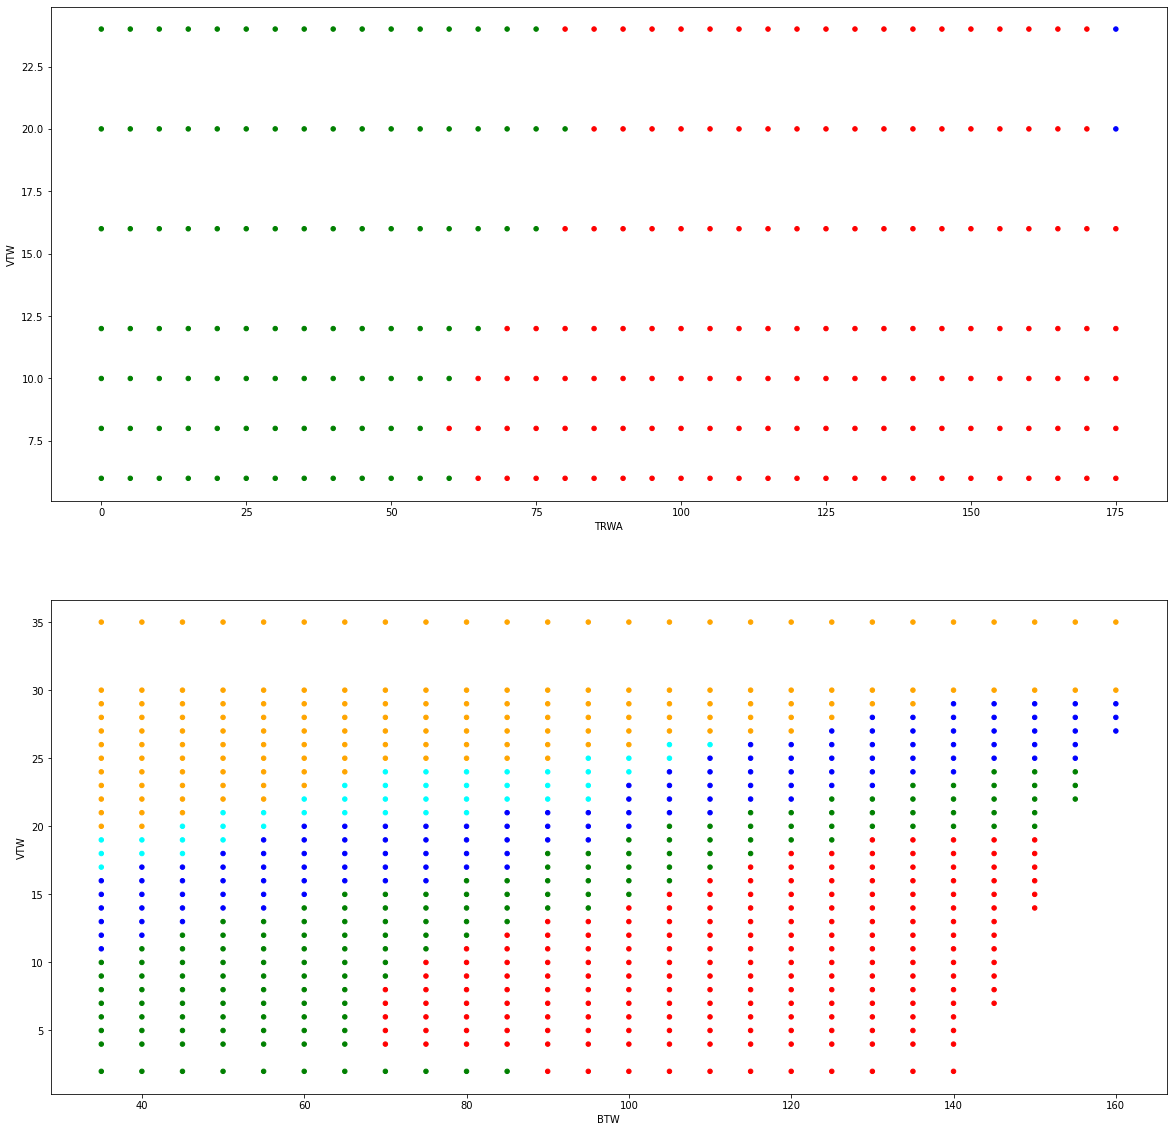

In [235]:
cmap = {'Asym Spin tacked on CL':'red', 'Jib':'green', 'Poled Jib':'blue'}
cmap2 = {'A1':'red', 'J1':'green', 'J2':'blue', 'J3':'cyan', 'SS':'orange'}
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
HeadSailPlt=finalDF.plot(x='TRWA', y='VTW', kind='scatter', 
        c=[cmap.get(c, 'black') for c in finalDF.SAIL],ax=ax1,marker='o')
HeadSailPlt2=steveB1_sailchoice_DF2.plot(x='BTW', y='VTW', kind='scatter', 
        c=[cmap2.get(c, 'black') for c in steveB1_sailchoice_DF2.sail],ax=ax2,marker='o')


Text(0, 0.5, 'Heal Angle')

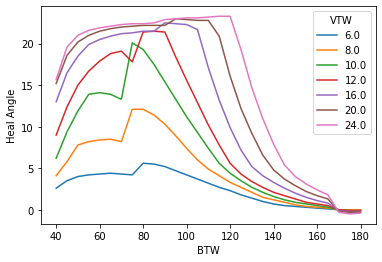

In [69]:
healAnglePlt=pd.pivot_table(df.reset_index(),
               index='BTW', columns='VTW', values='PHI'
              ).plot()
healAnglePlt.set_ylabel('Heal Angle')

Text(0, 0.5, 'Heal Angle')

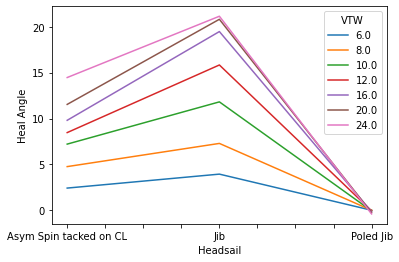

In [79]:
healAnglePlt=pd.pivot_table(df.reset_index(),
               index='Headsail', columns='VTW', values='PHI'
              ).plot()
healAnglePlt.set_ylabel('Heal Angle')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


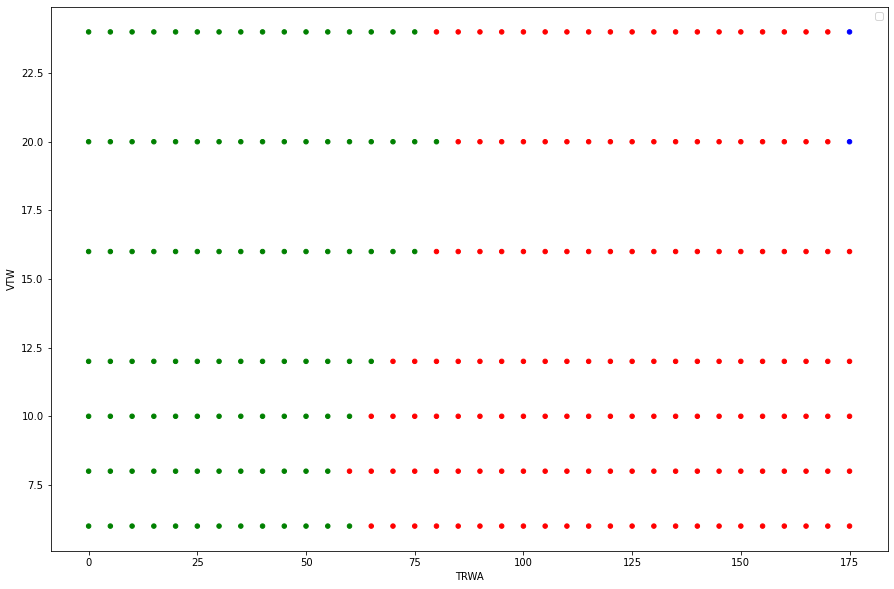

In [116]:
cmap = {'AS':'red', 'J':'green', 'PJ':'blue'}
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,1,1)
sailPlot=finalDF.plot(x='TRWA', y='VTW', kind='scatter', 
        c=[cmap.get(c, 'black') for c in finalDF.ShortSail],ax=ax1)
sailPlot.legend()
        # df.plot(kind='scatter',x='BTW',y='VTW' )

In [108]:
df2.SAIL.unique()

array(['Asym Spin tacked on CL', 'Jib', 'Poled Jib'], dtype=object)